# Парсин krasnoeibeloe.ru и анализ ассортимента

In [1]:
# Загрузка библиотек
from sklearn import grid_search, metrics, cross_validation, ensemble
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import urllib.request
from bs4 import BeautifulSoup
import re
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
import numpy as np
warnings.filterwarnings('ignore')
plt.style.use('seaborn-poster')

/home/myonin/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/myonin/anaconda3/lib/python3.5/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


## Парсинг данных

**Категории:**

1. Вино импорт

2. Вино Россия

3. Вино игристое, Вермут

4. Водка, Настойки

5. Виски, Бурбон

6. Коньяк, Армяньяк

7. Текила, Ром, Ликер

8. Пиво импорт

9. Пиво Россия

10. Пиво разливное

11. Винные коктейли

### Вино импорт

In [4]:
# Ссылки
links = []
for i in range(1, 16):
    links.append(str("https://krasnoeibeloe.ru/catalog/vino/?PAGEN_1="+str(i)))

In [121]:
# Сбор ссылок на карточки товаров
urls = []
for j in links:
    html = urllib.request.urlopen(j)
    html = BeautifulSoup(html)
    for i in html.find_all('div', class_='product_item_name'):
        urls.append('https://krasnoeibeloe.ru'+re.sub('.*href=\"|\">.*', '', str(i)))

In [139]:
# Сбор информации о товаре
name = []
size = []
country = []
degree = []
price = []
manufacturer = []
for j in urls:
    html = urllib.request.urlopen(j)
    html = BeautifulSoup(html)
    name.append(re.sub('\[<h1>|</h1>\]', '', str(html.find_all('h1'))))
    size.append(re.sub('.*\n<span>Объем</span>\n<p>|</p>\n</div>]', '', 
       str(html.find_all('div', class_='pr_card_char_item pr_card_char_item--VOLUME'))))
    country.append(re.sub('^|\n</div>\]', '', re.sub('.*\n<span>Страна</span>\n<p>|</p>\n.*', '', 
                                  str(html.find_all('div', class_='pr_card_char_item pr_card_char_item--COUNTRY')))))
    degree.append(re.sub('.*\n<span>Алкоголь</span>\n<p>|</p>\n.*', '', 
       str(html.find_all('div', class_='pr_card_char_item pr_card_char_item--ALCOHOL'))))
    price.append(re.sub('.*\n<span>Средняя цена</span>\n<p>|</p>\n.*', '', 
       str(html.find_all('div', class_='pr_card_char_item pr_card_char_item--'))))
    manufacturer.append(re.sub('.*\n<span>Производитель</span>\n<p>|</p>\n.*', '', 
       str(html.find_all('div', class_='pr_card_char_item pr_card_char_item--MANUFACTURER_NAME'))))

In [140]:
# Консолидация данных
df_vine = pd.DataFrame({'urls': urls,
                        'name': name,
                        'size': size,
                        'country': country,
                        'degree': degree,
                        'price': price,
                        'manufacturer': manufacturer})
df_vine.head()

,country,degree,manufacturer,name,price,size,urls
0,ЮАР,10.5,Home of Origin Wine,Вино Лайон`с Хэд геогр.наим.бел.п/сл,349.9,0.75,https://krasnoeibeloe.ru/catalog/vino/__639/
1,ЮАР,13.5,Home of Origin Wine,Вино Лайон`с Хэд геогр.наим.кр.п/сл,349.9,0.75,https://krasnoeibeloe.ru/catalog/vino/__646/
2,Испания,11,Bodegas Valdeorite,Вино Облиско Каберне Совиньон кр.п/сл,599.99,3,https://krasnoeibeloe.ru/catalog/vino/__640/
3,Новая Зеландия,12.5,Seifried Estate,Вино Хаулашор Совиньон Блан бел.сух,549.9,0.75,https://krasnoeibeloe.ru/catalog/vino/__650/
4,Франция,12,Bonnet &amp; Associes,Вино Шато Гран Бийар защ.наим.бел.сух,399.99,0.75,https://krasnoeibeloe.ru/catalog/vino/__157/


In [ ]:
# Безалкогольное вино
df_vine.degree[df_vine.degree=='[]'] = 0

In [174]:
# Сохранение данных
df_vine.to_csv('../data/df_vine.csv', index=False)

### Вино Россия

In [212]:
# Ссылки
links = []
for i in range(1, 5):
    links.append(str("https://krasnoeibeloe.ru/catalog/__2/?PAGEN_1="+str(i)))

# Сбор ссылок на карточки товаров
urls = []
for j in links:
    html = urllib.request.urlopen(j)
    html = BeautifulSoup(html)
    for i in html.find_all('div', class_='product_item_name'):
        urls.append('https://krasnoeibeloe.ru'+re.sub('.*href=\"|\">.*', '', str(i)))

In [216]:
# Сбор информации о товаре
name = []
size = []
country = []
degree = []
price = []
manufacturer = []
for j in urls:
    html = urllib.request.urlopen(j)
    html = BeautifulSoup(html)
    name.append(re.sub('\[<h1>|</h1>\]', '', str(html.find_all('h1'))))
    size.append(re.sub('.*\n<span>Объем</span>\n<p>|</p>\n</div>]', '', 
       str(html.find_all('div', class_='pr_card_char_item pr_card_char_item--VOLUME'))))
    country.append(re.sub('^|\n</div>\]', '', re.sub('.*\n<span>Страна</span>\n<p>|</p>\n.*', '', 
                                  str(html.find_all('div', class_='pr_card_char_item pr_card_char_item--COUNTRY')))))
    degree.append(re.sub('.*\n<span>Алкоголь</span>\n<p>|</p>\n.*', '', 
       str(html.find_all('div', class_='pr_card_char_item pr_card_char_item--ALCOHOL'))))
    price.append(re.sub('.*\n<span>Средняя цена</span>\n<p>|</p>\n.*', '', 
       str(html.find_all('div', class_='pr_card_char_item pr_card_char_item--'))))
    manufacturer.append(re.sub('.*\n<span>Производитель</span>\n<p>|</p>\n.*', '', 
       str(html.find_all('div', class_='pr_card_char_item pr_card_char_item--MANUFACTURER_NAME'))))

In [217]:
# Консолидация данных
df_vine_rus = pd.DataFrame({'urls': urls,
                            'name': name,
                            'size': size,
                            'country': country,
                            'degree': degree,
                            'price': price,
                            'manufacturer': manufacturer})
df_vine_rus.head()

,country,degree,manufacturer,name,price,size,urls
0,Россия,7,Таманская винная компания-Кубань,Вин. напиток Глинтвейн сл,169.9,1,https://krasnoeibeloe.ru/catalog/novinki/__638/
1,Россия,17,Винодельческое предприятие «ДИОНИС»,Вин. нап. Портвейн Приморский кр. алк.17% сах....,299.9,0.75,https://krasnoeibeloe.ru/catalog/__2/28892-vin...
2,Россия,10,ВИЛАШ,Вин. напиток Гранатовый Цветок кр.сл,179.9,0.75,https://krasnoeibeloe.ru/catalog/__2/__485/
3,Россия,17,Кубань Вино,Вин. напиток Изабелла крепкая алк.17% сах.40г/...,239.9,0.7,https://krasnoeibeloe.ru/catalog/__2/__103/
4,Россия,17,Кубань Вино,Вин. напиток Лидия крепкая алк.17% сах.50г/дм.куб,239.9,0.7,https://krasnoeibeloe.ru/catalog/__2/__102/


In [220]:
# Безалкогольное вино
df_vine_rus.degree[df_vine.degree=='[]'] = 0

In [221]:
# Сохранение данных
df_vine_rus.to_csv('../data/df_vine_rus.csv', index=False)

### Вино игристое, Вермут

In [225]:
# Ссылки
links = []
for i in range(1, 5):
    links.append(str("https://krasnoeibeloe.ru/catalog/vino_igristoe_shampanskoe/?PAGEN_1="+str(i)))

# Сбор ссылок на карточки товаров
urls = []
for j in links:
    html = urllib.request.urlopen(j)
    html = BeautifulSoup(html)
    for i in html.find_all('div', class_='product_item_name'):
        urls.append('https://krasnoeibeloe.ru'+re.sub('.*href=\"|\">.*', '', str(i)))

In [227]:
# Сбор информации о товаре
name = []
size = []
country = []
degree = []
price = []
manufacturer = []
for j in urls:
    html = urllib.request.urlopen(j)
    html = BeautifulSoup(html)
    name.append(re.sub('\[<h1>|</h1>\]', '', str(html.find_all('h1'))))
    size.append(re.sub('.*\n<span>Объем</span>\n<p>|</p>\n</div>]', '', 
       str(html.find_all('div', class_='pr_card_char_item pr_card_char_item--VOLUME'))))
    country.append(re.sub('^|\n</div>\]', '', re.sub('.*\n<span>Страна</span>\n<p>|</p>\n.*', '', 
                                  str(html.find_all('div', class_='pr_card_char_item pr_card_char_item--COUNTRY')))))
    degree.append(re.sub('.*\n<span>Алкоголь</span>\n<p>|</p>\n.*', '', 
       str(html.find_all('div', class_='pr_card_char_item pr_card_char_item--ALCOHOL'))))
    price.append(re.sub('.*\n<span>Средняя цена</span>\n<p>|</p>\n.*', '', 
       str(html.find_all('div', class_='pr_card_char_item pr_card_char_item--'))))
    manufacturer.append(re.sub('.*\n<span>Производитель</span>\n<p>|</p>\n.*', '', 
       str(html.find_all('div', class_='pr_card_char_item pr_card_char_item--MANUFACTURER_NAME'))))

In [228]:
# Консолидация данных
df_vine_shampan = pd.DataFrame({'urls': urls,
                                'name': name,
                                'size': size,
                                'country': country,
                                'degree': degree,
                                'price': price,
                                'manufacturer': manufacturer})
df_vine_shampan.head()

,country,degree,manufacturer,name,price,size,urls
0,Россия,7,"Вагрус, ООО",Вин. напиток Парижские Тайны газ.бел.п/сл,119.9,0.75,https://krasnoeibeloe.ru/catalog/vino_igristoe...
1,Россия,12,Винзавод Курсавский,Шампанское Российское Курсавское бел.п/сл,189.9,0.75,https://krasnoeibeloe.ru/catalog/vino_igristoe...
2,Италия,15,Polini Group Italia S.R.L.,Вермут Исси Бьянко сл,449.9,1,https://krasnoeibeloe.ru/catalog/vino_igristoe...
3,Италия,15,Polini Group Italia S.R.L.,Вермут Исси Бьянко сл,279.9,0.5,https://krasnoeibeloe.ru/catalog/vino_igristoe...
4,Италия,18,Martini &amp; Rossi,Вермут Мартини Экстра Драй бел.сух,599.86,0.75,https://krasnoeibeloe.ru/catalog/vino_igristoe...


In [230]:
# Сохранение данных
df_vine_shampan.to_csv('../data/df_vine_shampan.csv', index=False)

### Водка, Настойки

In [232]:
# Ссылки
links = []
for i in range(1, 7):
    links.append(str("https://krasnoeibeloe.ru/catalog/vodka_nastoyki/?PAGEN_1="+str(i)))

# Сбор ссылок на карточки товаров
urls = []
for j in links:
    html = urllib.request.urlopen(j)
    html = BeautifulSoup(html)
    for i in html.find_all('div', class_='product_item_name'):
        urls.append('https://krasnoeibeloe.ru'+re.sub('.*href=\"|\">.*', '', str(i)))

In [234]:
# Сбор информации о товаре
name = []
size = []
country = []
degree = []
price = []
manufacturer = []
for j in urls:
    html = urllib.request.urlopen(j)
    html = BeautifulSoup(html)
    name.append(re.sub('\[<h1>|</h1>\]', '', str(html.find_all('h1'))))
    size.append(re.sub('.*\n<span>Объем</span>\n<p>|</p>\n</div>]', '', 
       str(html.find_all('div', class_='pr_card_char_item pr_card_char_item--VOLUME'))))
    country.append(re.sub('^|\n</div>\]', '', re.sub('.*\n<span>Страна</span>\n<p>|</p>\n.*', '', 
                                  str(html.find_all('div', class_='pr_card_char_item pr_card_char_item--COUNTRY')))))
    degree.append(re.sub('.*\n<span>Алкоголь</span>\n<p>|</p>\n.*', '', 
       str(html.find_all('div', class_='pr_card_char_item pr_card_char_item--ALCOHOL'))))
    price.append(re.sub('.*\n<span>Средняя цена</span>\n<p>|</p>\n.*', '', 
       str(html.find_all('div', class_='pr_card_char_item pr_card_char_item--'))))
    manufacturer.append(re.sub('.*\n<span>Производитель</span>\n<p>|</p>\n.*', '', 
       str(html.find_all('div', class_='pr_card_char_item pr_card_char_item--MANUFACTURER_NAME'))))

In [235]:
# Консолидация данных
df_vodka = pd.DataFrame({'urls': urls,
                         'name': name,
                         'size': size,
                         'country': country,
                         'degree': degree,
                         'price': price,
                         'manufacturer': manufacturer})
df_vodka.head()

,country,degree,manufacturer,name,price,size,urls
0,Россия,38,Казанский ликероводочный завод,Водка Русская Валюта,201,0.5,https://krasnoeibeloe.ru/catalog/vodka_nastoyk...
1,Россия,38,"Топаз, ЛВЗ",Водка Топаз,100.5,0.25,https://krasnoeibeloe.ru/catalog/vodka_nastoyk...
2,Россия,40,[],Водка 100 лет Чебоксарская,109.94,0.25,https://krasnoeibeloe.ru/catalog/vodka_nastoyk...
3,Россия,40,[],Водка 100 лет Чебоксарская,209.97,0.5,https://krasnoeibeloe.ru/catalog/vodka_nastoyk...
4,Швеция,40,The Absolut Company AB,Водка Абсолют,848.38,0.75,https://krasnoeibeloe.ru/catalog/vodka_nastoyk...


In [238]:
# Сохранение данных
df_vodka.to_csv('../data/df_vodka.csv', index=False)

### Виски, Бурбон

In [239]:
# Ссылки
links = []
for i in range(1, 5):
    links.append(str("https://krasnoeibeloe.ru/catalog/viski/?PAGEN_1="+str(i)))

# Сбор ссылок на карточки товаров
urls = []
for j in links:
    html = urllib.request.urlopen(j)
    html = BeautifulSoup(html)
    for i in html.find_all('div', class_='product_item_name'):
        urls.append('https://krasnoeibeloe.ru'+re.sub('.*href=\"|\">.*', '', str(i)))

In [240]:
# Сбор информации о товаре
name = []
size = []
country = []
degree = []
price = []
manufacturer = []
for j in urls:
    html = urllib.request.urlopen(j)
    html = BeautifulSoup(html)
    name.append(re.sub('\[<h1>|</h1>\]', '', str(html.find_all('h1'))))
    size.append(re.sub('.*\n<span>Объем</span>\n<p>|</p>\n</div>]', '', 
       str(html.find_all('div', class_='pr_card_char_item pr_card_char_item--VOLUME'))))
    country.append(re.sub('^|\n</div>\]', '', re.sub('.*\n<span>Страна</span>\n<p>|</p>\n.*', '', 
                                  str(html.find_all('div', class_='pr_card_char_item pr_card_char_item--COUNTRY')))))
    degree.append(re.sub('.*\n<span>Алкоголь</span>\n<p>|</p>\n.*', '', 
       str(html.find_all('div', class_='pr_card_char_item pr_card_char_item--ALCOHOL'))))
    price.append(re.sub('.*\n<span>Средняя цена</span>\n<p>|</p>\n.*', '', 
       str(html.find_all('div', class_='pr_card_char_item pr_card_char_item--'))))
    manufacturer.append(re.sub('.*\n<span>Производитель</span>\n<p>|</p>\n.*', '', 
       str(html.find_all('div', class_='pr_card_char_item pr_card_char_item--MANUFACTURER_NAME'))))

In [241]:
# Консолидация данных
df_viski = pd.DataFrame({'urls': urls,
                         'name': name,
                         'size': size,
                         'country': country,
                         'degree': degree,
                         'price': price,
                         'manufacturer': manufacturer})
df_viski.head()

,country,degree,manufacturer,name,price,size,urls
0,Испания,40,Fortune Brands,Нап.спиртной Джим Бим Рэд Стаг Блэк Черри,899.87,0.5,https://krasnoeibeloe.ru/catalog/viski/__641/
1,Беларусь,40,«Паричская винарня» ООО,Виски (бурбон) Боб Монти,499.9,0.5,https://krasnoeibeloe.ru/catalog/viski/__343/
2,США,45,Diageo,Виски (Бурбон) Буллет,1449.37,0.7,https://krasnoeibeloe.ru/catalog/viski/__588/
3,США,43.2,Woodford Reserve Distillery,Виски (бурбон) Вудфорд Резерв п/к,3398.76,0.75,https://krasnoeibeloe.ru/catalog/viski/__62/
4,США,40,Fortune Brands,Виски (бурбон) Джим Бим,865.06,0.5,https://krasnoeibeloe.ru/catalog/viski/__18/


In [242]:
# Сохранение данных
df_viski.to_csv('../data/df_viski.csv', index=False)

### Коньяк, Армяньяк

In [243]:
# Ссылки
links = []
for i in range(1, 6):
    links.append(str("https://krasnoeibeloe.ru/catalog/konyak_armanyak_brendi/?PAGEN_1="+str(i)))

# Сбор ссылок на карточки товаров
urls = []
for j in links:
    html = urllib.request.urlopen(j)
    html = BeautifulSoup(html)
    for i in html.find_all('div', class_='product_item_name'):
        urls.append('https://krasnoeibeloe.ru'+re.sub('.*href=\"|\">.*', '', str(i)))

In [244]:
# Сбор информации о товаре
name = []
size = []
country = []
degree = []
price = []
manufacturer = []
for j in urls:
    html = urllib.request.urlopen(j)
    html = BeautifulSoup(html)
    name.append(re.sub('\[<h1>|</h1>\]', '', str(html.find_all('h1'))))
    size.append(re.sub('.*\n<span>Объем</span>\n<p>|</p>\n</div>]', '', 
       str(html.find_all('div', class_='pr_card_char_item pr_card_char_item--VOLUME'))))
    country.append(re.sub('^|\n</div>\]', '', re.sub('.*\n<span>Страна</span>\n<p>|</p>\n.*', '', 
                                  str(html.find_all('div', class_='pr_card_char_item pr_card_char_item--COUNTRY')))))
    degree.append(re.sub('.*\n<span>Алкоголь</span>\n<p>|</p>\n.*', '', 
       str(html.find_all('div', class_='pr_card_char_item pr_card_char_item--ALCOHOL'))))
    price.append(re.sub('.*\n<span>Средняя цена</span>\n<p>|</p>\n.*', '', 
       str(html.find_all('div', class_='pr_card_char_item pr_card_char_item--'))))
    manufacturer.append(re.sub('.*\n<span>Производитель</span>\n<p>|</p>\n.*', '', 
       str(html.find_all('div', class_='pr_card_char_item pr_card_char_item--MANUFACTURER_NAME'))))

In [245]:
# Консолидация данных
df_brendi = pd.DataFrame({'urls': urls,
                          'name': name,
                          'size': size,
                          'country': country,
                          'degree': degree,
                          'price': price,
                          'manufacturer': manufacturer})
df_brendi.head()

,country,degree,manufacturer,name,price,size,urls
0,Франция,40,DELORD FRERES SA,Арманьяк Делор VSOP п/к,1999.9,0.7,https://krasnoeibeloe.ru/catalog/konyak_armany...
1,Франция,40,DELORD FRERES SA,Арманьяк Делор ХО п/к,2999.9,0.7,https://krasnoeibeloe.ru/catalog/konyak_armany...
2,Молдова,40,"Тираспольский винно-коньячный завод «KVINT», ЗАО",Бренди Квинт,389.9,0.5,https://krasnoeibeloe.ru/catalog/konyak_armany...
3,Греция,38,S and E and A Metaxa ABE,Бренди Метакса 5*,697.29,0.5,https://krasnoeibeloe.ru/catalog/konyak_armany...
4,Греция,38,S and E and A Metaxa ABE,Бренди Метакса 5* п/к + 2 бокала,1099.99,0.7,https://krasnoeibeloe.ru/catalog/konyak_armany...


In [246]:
# Сохранение данных
df_brendi.to_csv('../data/df_brendi.csv', index=False)

### Текила, Ром, Ликер

In [247]:
# Ссылки
links = []
for i in range(1, 4):
    links.append(str("https://krasnoeibeloe.ru/catalog/rom_jin_tequila_liquor/?PAGEN_1="+str(i)))

# Сбор ссылок на карточки товаров
urls = []
for j in links:
    html = urllib.request.urlopen(j)
    html = BeautifulSoup(html)
    for i in html.find_all('div', class_='product_item_name'):
        urls.append('https://krasnoeibeloe.ru'+re.sub('.*href=\"|\">.*', '', str(i)))

In [248]:
# Сбор информации о товаре
name = []
size = []
country = []
degree = []
price = []
manufacturer = []
for j in urls:
    html = urllib.request.urlopen(j)
    html = BeautifulSoup(html)
    name.append(re.sub('\[<h1>|</h1>\]', '', str(html.find_all('h1'))))
    size.append(re.sub('.*\n<span>Объем</span>\n<p>|</p>\n</div>]', '', 
       str(html.find_all('div', class_='pr_card_char_item pr_card_char_item--VOLUME'))))
    country.append(re.sub('^|\n</div>\]', '', re.sub('.*\n<span>Страна</span>\n<p>|</p>\n.*', '', 
                                  str(html.find_all('div', class_='pr_card_char_item pr_card_char_item--COUNTRY')))))
    degree.append(re.sub('.*\n<span>Алкоголь</span>\n<p>|</p>\n.*', '', 
       str(html.find_all('div', class_='pr_card_char_item pr_card_char_item--ALCOHOL'))))
    price.append(re.sub('.*\n<span>Средняя цена</span>\n<p>|</p>\n.*', '', 
       str(html.find_all('div', class_='pr_card_char_item pr_card_char_item--'))))
    manufacturer.append(re.sub('.*\n<span>Производитель</span>\n<p>|</p>\n.*', '', 
       str(html.find_all('div', class_='pr_card_char_item pr_card_char_item--MANUFACTURER_NAME'))))

In [249]:
# Консолидация данных
df_rom = pd.DataFrame({'urls': urls,
                       'name': name,
                       'size': size,
                       'country': country,
                       'degree': degree,
                       'price': price,
                       'manufacturer': manufacturer})
df_rom.head()

,country,degree,manufacturer,name,price,size,urls
0,Гватемала,40,Zacapa Centenario,Ром Закапа Юбилейный 23 года п/к,3953.82,0.7,https://krasnoeibeloe.ru/catalog/rom_jin_tequi...
1,Италия,70,Torino Distillati S.r.l.,Абсент Ксента Абсент п/к,1499.97,0.7,https://krasnoeibeloe.ru/catalog/rom_jin_tequi...
2,Россия,18,Глазовский ликеро-водочный завод,Аперитив Степные травы,46.88,0.1,https://krasnoeibeloe.ru/catalog/rom_jin_tequi...
3,Россия,45,Башспирт,Бальзам Агидель Колос,289.26,0.5,https://krasnoeibeloe.ru/catalog/rom_jin_tequi...
4,Россия,45,Башспирт,Бальзам Агидель народная,166.86,0.25,https://krasnoeibeloe.ru/catalog/rom_jin_tequi...


In [250]:
# Сохранение данных
df_rom.to_csv('../data/df_rom.csv', index=False)

### Пиво импорт

In [252]:
# Ссылки
links = []
for i in range(1, 2):
    links.append(str("https://krasnoeibeloe.ru/catalog/importnoe_pivo/?PAGEN_1="+str(i)))

# Сбор ссылок на карточки товаров
urls = []
for j in links:
    html = urllib.request.urlopen(j)
    html = BeautifulSoup(html)
    for i in html.find_all('div', class_='product_item_name'):
        urls.append('https://krasnoeibeloe.ru'+re.sub('.*href=\"|\">.*', '', str(i)))

In [254]:
# Сбор информации о товаре
name = []
size = []
country = []
degree = []
price = []
manufacturer = []
for j in urls:
    html = urllib.request.urlopen(j)
    html = BeautifulSoup(html)
    name.append(re.sub('\[<h1>|</h1>\]', '', str(html.find_all('h1'))))
    size.append(re.sub('.*\n<span>Объем</span>\n<p>|</p>\n</div>]', '', 
       str(html.find_all('div', class_='pr_card_char_item pr_card_char_item--VOLUME'))))
    country.append(re.sub('^|\n</div>\]', '', re.sub('.*\n<span>Страна</span>\n<p>|</p>\n.*', '', 
                                  str(html.find_all('div', class_='pr_card_char_item pr_card_char_item--COUNTRY')))))
    degree.append(re.sub('.*\n<span>Алкоголь</span>\n<p>|</p>\n.*', '', 
       str(html.find_all('div', class_='pr_card_char_item pr_card_char_item--ALCOHOL'))))
    price.append(re.sub('.*\n<span>Средняя цена</span>\n<p>|</p>\n.*', '', 
       str(html.find_all('div', class_='pr_card_char_item pr_card_char_item--'))))
    manufacturer.append(re.sub('.*\n<span>Производитель</span>\n<p>|</p>\n.*', '', 
       str(html.find_all('div', class_='pr_card_char_item pr_card_char_item--MANUFACTURER_NAME'))))

In [255]:
# Консолидация данных
df_pivo = pd.DataFrame({'urls': urls,
                        'name': name,
                        'size': size,
                        'country': country,
                        'degree': degree,
                        'price': price,
                        'manufacturer': manufacturer})
df_pivo.head()

,country,degree,manufacturer,name,price,size,urls
0,Мексика,4.5,САН ИнБев,Пивной нап. Корона Экстра светлое ст.,75.54,0.355,https://krasnoeibeloe.ru/catalog/importnoe_piv...
1,Германия,5,Brauerei Mönchengladbach,"Пиво 5,0 Вайсбир светлое нефильтр.",59.99,0.5,https://krasnoeibeloe.ru/catalog/importnoe_piv...
2,Германия,5,Brauerei Mönchengladbach,"Пиво 5,0 Крафт светлое ж/б",59.99,0.5,https://krasnoeibeloe.ru/catalog/importnoe_piv...
3,Германия,5.4,Brauerei Mönchengladbach,"Пиво 5,0 Лагер светлое ж/б",59.99,0.5,https://krasnoeibeloe.ru/catalog/importnoe_piv...
4,Германия,5,Brauerei Mönchengladbach,"Пиво 5,0 Пилс светлое ж/б",59.99,0.5,https://krasnoeibeloe.ru/catalog/importnoe_piv...


In [256]:
# Сохранение данных
df_pivo.to_csv('../data/df_pivo.csv', index=False)

### Пиво Россия

In [257]:
# Ссылки
links = []
for i in range(1, 2):
    links.append(str("https://krasnoeibeloe.ru/catalog/rossiyskoe/?PAGEN_1="+str(i)))

# Сбор ссылок на карточки товаров
urls = []
for j in links:
    html = urllib.request.urlopen(j)
    html = BeautifulSoup(html)
    for i in html.find_all('div', class_='product_item_name'):
        urls.append('https://krasnoeibeloe.ru'+re.sub('.*href=\"|\">.*', '', str(i)))

In [259]:
# Сбор информации о товаре
name = []
size = []
country = []
degree = []
price = []
manufacturer = []
for j in urls:
    html = urllib.request.urlopen(j)
    html = BeautifulSoup(html)
    name.append(re.sub('\[<h1>|</h1>\]', '', str(html.find_all('h1'))))
    size.append(re.sub('.*\n<span>Объем</span>\n<p>|</p>\n</div>]', '', 
       str(html.find_all('div', class_='pr_card_char_item pr_card_char_item--VOLUME'))))
    country.append(re.sub('^|\n</div>\]', '', re.sub('.*\n<span>Страна</span>\n<p>|</p>\n.*', '', 
                                  str(html.find_all('div', class_='pr_card_char_item pr_card_char_item--COUNTRY')))))
    degree.append(re.sub('.*\n<span>Алкоголь</span>\n<p>|</p>\n.*', '', 
       str(html.find_all('div', class_='pr_card_char_item pr_card_char_item--ALCOHOL'))))
    price.append(re.sub('.*\n<span>Средняя цена</span>\n<p>|</p>\n.*', '', 
       str(html.find_all('div', class_='pr_card_char_item pr_card_char_item--'))))
    manufacturer.append(re.sub('.*\n<span>Производитель</span>\n<p>|</p>\n.*', '', 
       str(html.find_all('div', class_='pr_card_char_item pr_card_char_item--MANUFACTURER_NAME'))))

In [260]:
# Консолидация данных
df_pivo_rus = pd.DataFrame({'urls': urls,
                            'name': name,
                            'size': size,
                            'country': country,
                            'degree': degree,
                            'price': price,
                            'manufacturer': manufacturer})
df_pivo_rus.head()

,country,degree,manufacturer,name,price,size,urls
0,Россия,4.5,"Московская Пивоваренная Компания, ЗАО",Пиво Хамовники Венское светлое пастериз. ж/б,49.89,0.45,https://krasnoeibeloe.ru/catalog/rossiyskoe/__...
1,Россия,4.5,«Завод трёхсосенский»,Пиво Жигулевское Оригинальное светлое ж/б,38.99,0.5,https://krasnoeibeloe.ru/catalog/rossiyskoe/36...
2,Россия,4.9,«Завод трёхсосенский»,Пиво Жигулевское Экспорт светлое ст.,41.9,0.5,https://krasnoeibeloe.ru/catalog/rossiyskoe/21...
3,Россия,4.9,"Московская Пивоваренная Компания, ЗАО",Пиво Жигули Барное светлое пастер. ст.,28.72,0.33,https://krasnoeibeloe.ru/catalog/rossiyskoe/__...
4,Россия,4.8,"Московская Пивоваренная Компания, ЗАО",Пиво Жигули Барное Экспорт светлое фильтр. ст.,36.2,0.45,https://krasnoeibeloe.ru/catalog/rossiyskoe/__...


In [261]:
# Сохранение данных
df_pivo_rus.to_csv('../data/df_pivo_rus.csv', index=False)

### Пиво разливное

In [262]:
# Ссылки
links = []
for i in range(1, 2):
    links.append(str("https://krasnoeibeloe.ru/catalog/razlivnoe_pivo/?PAGEN_1="+str(i)))

# Сбор ссылок на карточки товаров
urls = []
for j in links:
    html = urllib.request.urlopen(j)
    html = BeautifulSoup(html)
    for i in html.find_all('div', class_='product_item_name'):
        urls.append('https://krasnoeibeloe.ru'+re.sub('.*href=\"|\">.*', '', str(i)))

In [263]:
# Сбор информации о товаре
name = []
size = []
country = []
degree = []
price = []
manufacturer = []
for j in urls:
    html = urllib.request.urlopen(j)
    html = BeautifulSoup(html)
    name.append(re.sub('\[<h1>|</h1>\]', '', str(html.find_all('h1'))))
    size.append(re.sub('.*\n<span>Объем</span>\n<p>|</p>\n</div>]', '', 
       str(html.find_all('div', class_='pr_card_char_item pr_card_char_item--VOLUME'))))
    country.append(re.sub('^|\n</div>\]', '', re.sub('.*\n<span>Страна</span>\n<p>|</p>\n.*', '', 
                                  str(html.find_all('div', class_='pr_card_char_item pr_card_char_item--COUNTRY')))))
    degree.append(re.sub('.*\n<span>Алкоголь</span>\n<p>|</p>\n.*', '', 
       str(html.find_all('div', class_='pr_card_char_item pr_card_char_item--ALCOHOL'))))
    price.append(re.sub('.*\n<span>Средняя цена</span>\n<p>|</p>\n.*', '', 
       str(html.find_all('div', class_='pr_card_char_item pr_card_char_item--'))))
    manufacturer.append(re.sub('.*\n<span>Производитель</span>\n<p>|</p>\n.*', '', 
       str(html.find_all('div', class_='pr_card_char_item pr_card_char_item--MANUFACTURER_NAME'))))

In [264]:
# Консолидация данных
df_pivo_raz = pd.DataFrame({'urls': urls,
                            'name': name,
                            'size': size,
                            'country': country,
                            'degree': degree,
                            'price': price,
                            'manufacturer': manufacturer})
df_pivo_raz.head()

,country,degree,manufacturer,name,price,size,urls
0,Россия,4.6,Пивоваренная компания «Балтика»,"Пиво Балтика 3 св. креп4,6% плот11,5%+тара 3,99р",47.49,1,https://krasnoeibeloe.ru/catalog/razlivnoe_piv...
1,Россия,4.6,«Завод трёхсосенский»,"Пиво Бархатное темное креп4,6% плот12%+тара 3,99р",80.27,1,https://krasnoeibeloe.ru/catalog/razlivnoe_piv...
2,Россия,4.9,«Завод трёхсосенский»,"Пиво Варим сусло нефильт. креп4,9% плот12%+тар...",85.74,1,https://krasnoeibeloe.ru/catalog/razlivnoe_piv...
3,Россия,4.5,«Завод трёхсосенский»,"Пиво Венское св. пастер. креп4,5% плот11%+тара...",69.57,1,https://krasnoeibeloe.ru/catalog/razlivnoe_piv...
4,Россия,4.7,Heineken,"Пиво Гёссер св. креп4,7% плот11,3%+тара 3,99р",61.47,1,https://krasnoeibeloe.ru/catalog/razlivnoe_piv...


In [265]:
# Сохранение данных
df_pivo_raz.to_csv('../data/df_pivo_raz.csv', index=False)

### Винные коктейли

In [266]:
# Ссылки
links = []
for i in range(1, 2):
    links.append(str("https://krasnoeibeloe.ru/catalog/__7/?PAGEN_1="+str(i)))

# Сбор ссылок на карточки товаров
urls = []
for j in links:
    html = urllib.request.urlopen(j)
    html = BeautifulSoup(html)
    for i in html.find_all('div', class_='product_item_name'):
        urls.append('https://krasnoeibeloe.ru'+re.sub('.*href=\"|\">.*', '', str(i)))

In [267]:
# Сбор информации о товаре
name = []
size = []
country = []
degree = []
price = []
manufacturer = []
for j in urls:
    html = urllib.request.urlopen(j)
    html = BeautifulSoup(html)
    name.append(re.sub('\[<h1>|</h1>\]', '', str(html.find_all('h1'))))
    size.append(re.sub('.*\n<span>Объем</span>\n<p>|</p>\n</div>]', '', 
       str(html.find_all('div', class_='pr_card_char_item pr_card_char_item--VOLUME'))))
    country.append(re.sub('^|\n</div>\]', '', re.sub('.*\n<span>Страна</span>\n<p>|</p>\n.*', '', 
                                  str(html.find_all('div', class_='pr_card_char_item pr_card_char_item--COUNTRY')))))
    degree.append(re.sub('.*\n<span>Алкоголь</span>\n<p>|</p>\n.*', '', 
       str(html.find_all('div', class_='pr_card_char_item pr_card_char_item--ALCOHOL'))))
    price.append(re.sub('.*\n<span>Средняя цена</span>\n<p>|</p>\n.*', '', 
       str(html.find_all('div', class_='pr_card_char_item pr_card_char_item--'))))
    manufacturer.append(re.sub('.*\n<span>Производитель</span>\n<p>|</p>\n.*', '', 
       str(html.find_all('div', class_='pr_card_char_item pr_card_char_item--MANUFACTURER_NAME'))))

In [268]:
# Консолидация данных
df_kokt = pd.DataFrame({'urls': urls,
                        'name': name,
                        'size': size,
                        'country': country,
                        'degree': degree,
                        'price': price,
                        'manufacturer': manufacturer})
df_kokt.head()

,country,degree,manufacturer,name,price,size,urls
0,Россия,5,Нижнеломовский ЛВЗ,Сидр грушевый Два гуся газ. ж/б,49.9,0.5,https://krasnoeibeloe.ru/catalog/novinki/__649/
1,Россия,10,Нижнеломовский ЛВЗ,Вин. напиток газ. Бельбоско Асти ж/б,54.84,0.5,https://krasnoeibeloe.ru/catalog/__7/__392/
2,Россия,10,Нижнеломовский ЛВЗ,Вин. напиток газ. Бельбоско Розали ж/б,54.86,0.5,https://krasnoeibeloe.ru/catalog/__7/__391/
3,Россия,8.5,Объединенные Пензенские Водочные Заводы,Коктейль вин.газ. Регстаерс джин-тоник лимон/лайм,48.71,0.5,https://krasnoeibeloe.ru/catalog/__7/__143/
4,Россия,7.2,Объединенные Пензенские Водочные Заводы,Коктейль винный газ. Золотой Джокер Биттер-Лем...,49.9,0.5,https://krasnoeibeloe.ru/catalog/__7/__292/


In [269]:
# Сохранение данных
df_kokt.to_csv('../data/df_kokt.csv', index=False)

## Обработка данных

In [10]:
# Загрузка данных
df_brendi = pd.read_csv('../data/df_brendi.csv')
df_brendi['category'] = 'Коньяк, Армяньяк'
df_kokt = pd.read_csv('../data/df_kokt.csv')
df_kokt['category'] = 'Винные коктейли'
df_pivo = pd.read_csv('../data/df_pivo.csv')
df_pivo['category'] = 'Пиво импорт'
df_pivo_raz = pd.read_csv('../data/df_pivo_raz.csv')
df_pivo_raz['category'] = 'Пиво разливное'
df_pivo_rus = pd.read_csv('../data/df_pivo_rus.csv')
df_pivo_rus['category'] = 'Пиво Россия'
df_rom = pd.read_csv('../data/df_rom.csv')
df_rom['category'] = 'Текила, Ром, Ликер'
df_vine = pd.read_csv('../data/df_vine.csv')
df_vine['category'] = 'Вино импорт'
df_vine_rus = pd.read_csv('../data/df_vine_rus.csv')
df_vine_rus['category'] = 'Вино Россия'
df_vine_shampan = pd.read_csv('../data/df_vine_shampan.csv')
df_vine_shampan['category'] = 'Вино игристое, Вермут'
df_viski = pd.read_csv('../data/df_viski.csv')
df_viski['category'] = 'Виски, Бурбон'
df_vodka = pd.read_csv('../data/df_vodka.csv')
df_vodka['category'] = 'Водка, Настойки'

# Объединение данных
df = pd.concat([df_brendi, df_kokt, df_pivo, df_pivo_raz, df_pivo_rus, 
               df_rom, df_vine, df_vine_rus, df_vine_shampan, 
               df_viski, df_vodka], ignore_index=True)

# Сохранение данных
df.to_csv('../data/df_alko.csv', index=False)

In [7]:
# Загрузка данных
df = pd.read_csv('../data/df_alko.csv')
df.head()

,country,degree,manufacturer,name,price,size,urls,category
0,Франция,40,DELORD FRERES SA,Арманьяк Делор VSOP п/к,1999.90,0.7,https://krasnoeibeloe.ru/catalog/konyak_armany...,"Коньяк, Армяньяк"
1,Франция,40,DELORD FRERES SA,Арманьяк Делор ХО п/к,2999.90,0.7,https://krasnoeibeloe.ru/catalog/konyak_armany...,"Коньяк, Армяньяк"
2,Молдова,40,"Тираспольский винно-коньячный завод «KVINT», ЗАО",Бренди Квинт,389.90,0.5,https://krasnoeibeloe.ru/catalog/konyak_armany...,"Коньяк, Армяньяк"
3,Греция,38,S and E and A Metaxa ABE,Бренди Метакса 5*,697.29,0.5,https://krasnoeibeloe.ru/catalog/konyak_armany...,"Коньяк, Армяньяк"
4,Греция,38,S and E and A Metaxa ABE,Бренди Метакса 5* п/к + 2 бокала,1099.99,0.7,https://krasnoeibeloe.ru/catalog/konyak_armany...,"Коньяк, Армяньяк"


In [8]:
# Выбор колонок
df = df.drop(['name', 'urls'], 1)

# Замена пропущенных значений
df.manufacturer[df.manufacturer=='[]'] = "Неизвестно"
df.degree[df.degree=='[]'] = 0
df.degree = df.degree.astype('float')

# Объединение категорий
df.category[df['category'].isin(['Вино импорт', 'Вино Россия'])] = 'Вино'
df.category[df['category'].isin(['Пиво импорт', 'Пиво разливное', 'Пиво Россия'])] = 'Пиво'
df.country[df.country == 'Соед.Королевст'] = 'Великобритания'

# Перевод в категории
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')
for col in df.select_dtypes(include=['category']).columns:
    df[col] = df[col].cat.codes

In [4]:
df.head(10)

,country,degree,manufacturer,price,size,category
0,27,40.0,60,1999.90,0.70,5
1,27,40.0,60,2999.90,0.70,5
2,20,40.0,246,389.90,0.50,5
3,11,38.0,131,697.29,0.50,5
4,11,38.0,131,1099.99,0.70,5
5,24,40.0,170,293.00,0.50,5
6,24,40.0,170,149.99,0.25,5
7,27,40.0,0,1187.84,0.70,5
8,24,40.0,170,293.12,0.50,5
9,24,40.0,170,149.99,0.25,5


## Случайный лес

In [25]:
# Разбивка на тренировочный и тестовый датасеты
target = df.pop('price')
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(df, target, test_size = 0.3)

In [26]:
# Вызов модели
model = ensemble.RandomForestRegressor()

# Параметры настройки
parameters_grid = {
    'max_depth' : [5, 10, 15, 30],
    'n_estimators' : [150, 250, 300, 500]
}

# Стратегия кроссвалидации
grid_cv = GridSearchCV(model, parameters_grid)

# Стратегия посика
# grid_cv = grid_search.RandomizedSearchCV(model, parameters_grid, scoring = 'accuracy', cv = cv)

# Обучение модели по сетке параметров
grid_cv.fit(train_data, train_labels)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [150, 250, 300, 500], 'max_depth': [5, 10, 15, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [28]:
# Предсказание
predict_labels = grid_cv.best_estimator_.predict(test_data)

# Точность предсказания
metrics.r2_score(test_labels, predict_labels)

0.39588785948604077

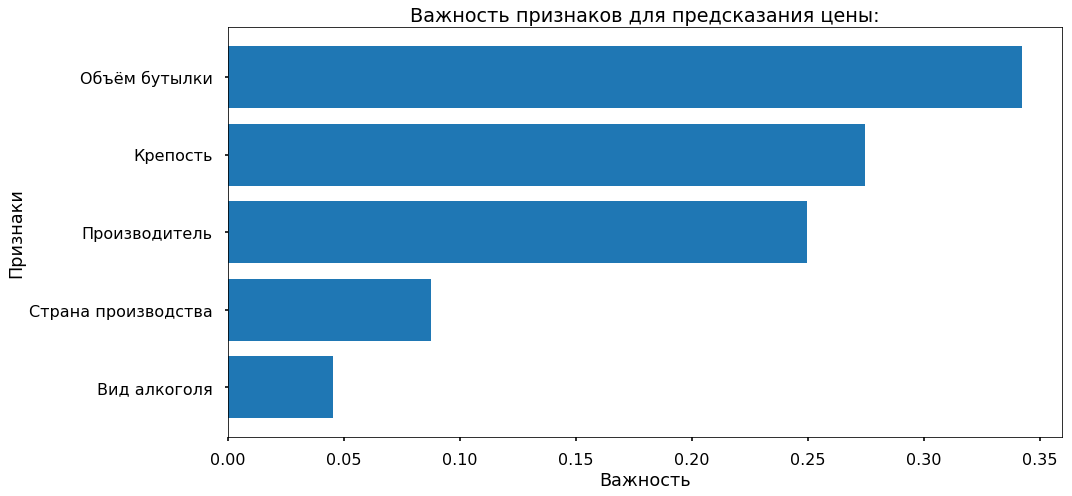

In [30]:
# Важность признаков
df_plot = pd.DataFrame({'features': df.columns[df.columns != 'price'],
                        'importances': grid_cv.best_estimator_.feature_importances_})
df_plot = df_plot.sort_values('importances', ascending=False)
df_plot.features = ['Объём бутылки', 'Крепость', 'Производитель', 'Страна производства', 'Вид алкоголя']

# График важности признаков
fig = plt.figure(figsize=[15,7])
ax = fig.add_subplot(111)
ax.barh(np.arange(len(df_plot.features))[::-1], df_plot.importances)
ax.set_yticks(np.arange(len(df_plot.features))[::-1])
ax.set_yticklabels(df_plot.features)
plt.title('Importances of Features Plot')
plt.title('Важность признаков для предсказания цены:')
plt.ylabel('Признаки')
plt.xlabel('Важность')
plt.tight_layout()
plt.show()
fig.savefig('../images/Важность признаков.png')

## XGboost

In [84]:
# Загрузка данных
df = pd.read_csv('../data/df_alko.csv')

# Выбор колонок
df = df.drop(['name', 'urls'], 1)

# Замена пропущенных значений
df.manufacturer[df.manufacturer=='[]'] = "Неизвестно"
df.degree[df.degree=='[]'] = 0
df.degree = df.degree.astype('float')

# Объединение категорий
df.category[df['category'].isin(['Вино импорт', 'Вино Россия'])] = 'Вино'
df.category[df['category'].isin(['Пиво импорт', 'Пиво разливное', 'Пиво Россия'])] = 'Пиво'
df.country[df.country == 'Соед.Королевст'] = 'Великобритания'

# Создание dummies-колонок
df = pd.concat([df[['degree', 'price', 'size']], pd.get_dummies(df[['country', 'manufacturer', 'category']])], axis=1)

In [86]:
# Разбивка на тренировочный и тестовый датасеты
target = df.pop('price')
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(df, target, test_size = 0.3)

In [87]:
# Вызов модели
model = xgb.XGBRegressor()

# Параметры настройки
parameters_grid = {
    'learning_rate' : [0.1, 0.2, 0.5],
    'max_depth' : [5, 10, 15, 30],
    'n_estimators' : [150, 250, 300, 500],
    'min_child_weight' : [3, 5, 10, 20]
}

# Стратегия кроссвалидации
grid_cv = GridSearchCV(model, parameters_grid)

# Обучение модели по сетке параметров
grid_cv.fit(train_data, train_labels)

GridSearchCV(cv=None, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_child_weight': [3, 5, 10, 20], 'n_estimators': [150, 250, 300, 500], 'learning_rate': [0.1, 0.2, 0.5], 'max_depth': [5, 10, 15, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

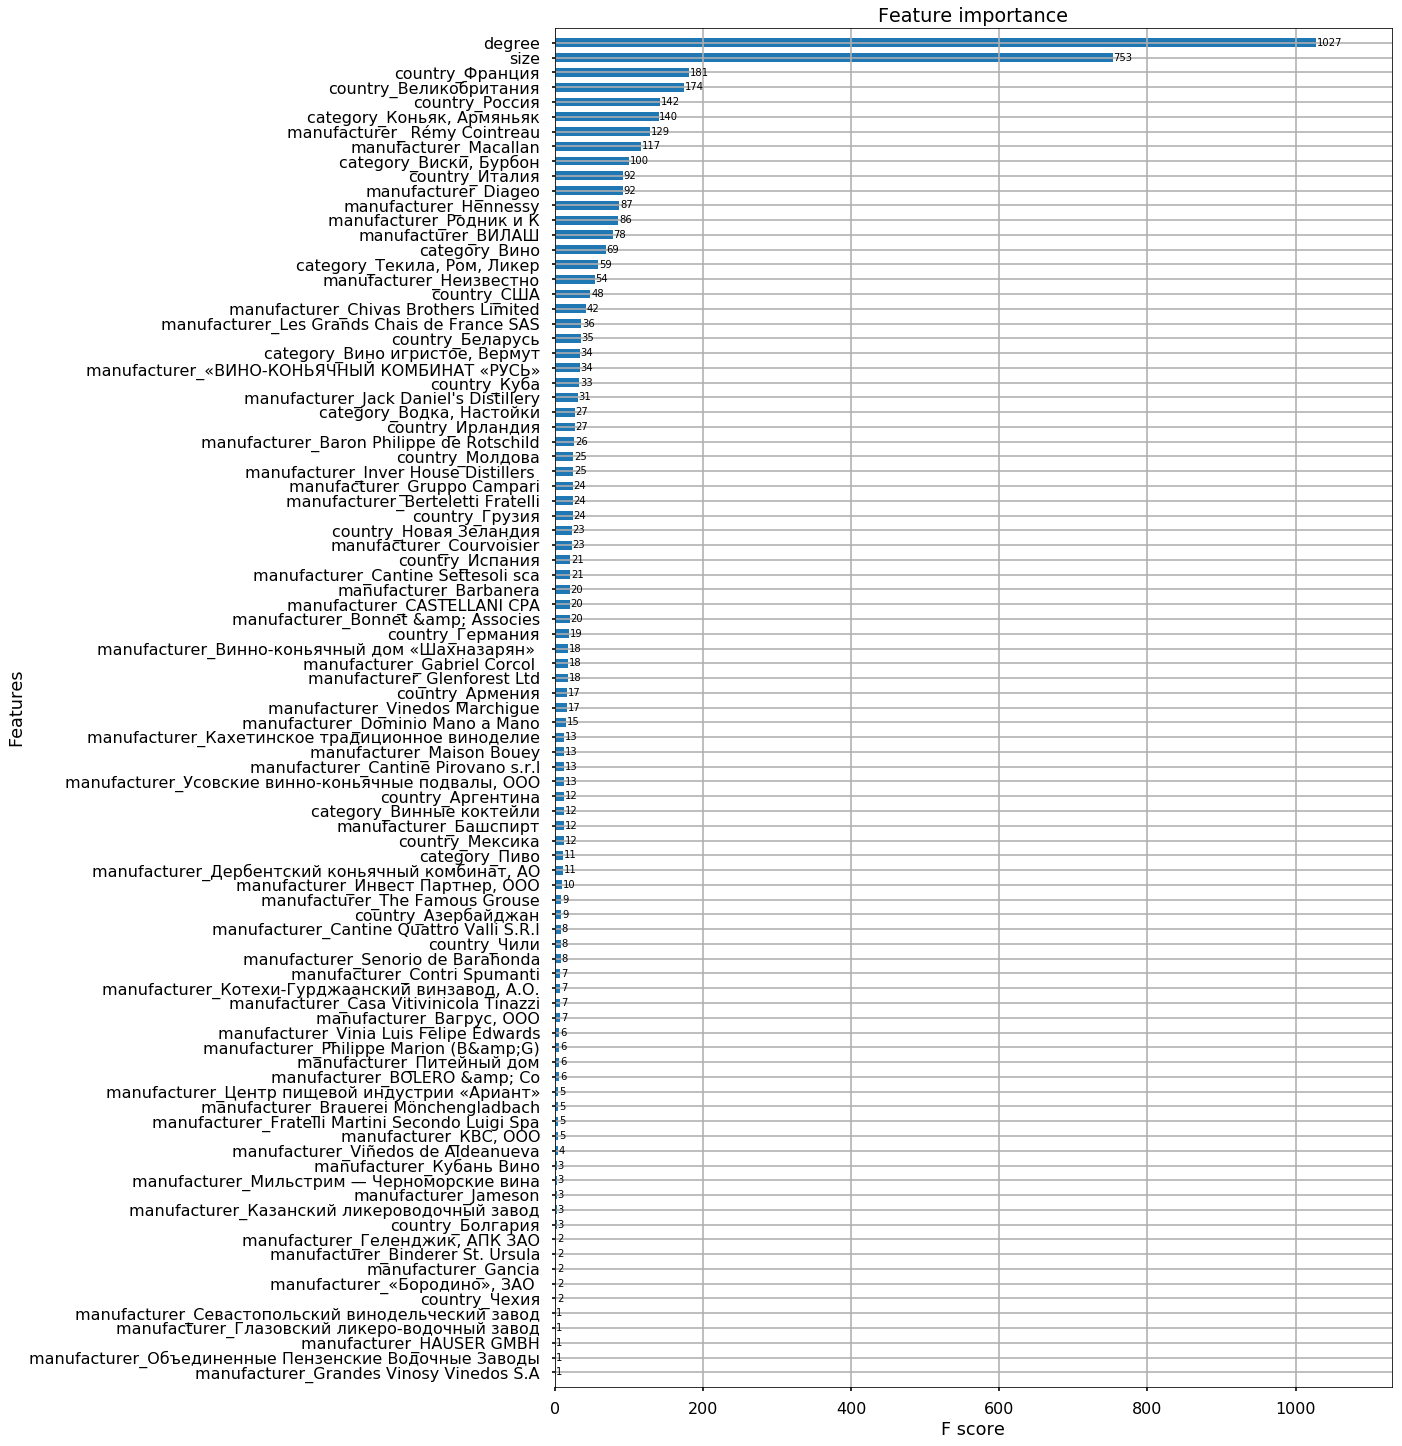

In [112]:
# График важности признаков
fig = plt.figure(figsize=[15,25])
ax = fig.add_subplot(111)
xgb.plot_importance(grid_cv.best_estimator_, ax=ax, height=0.6)
plt.show()

In [111]:
# Предсказание
predict_labels = grid_cv.best_estimator_.predict(test_data)

# Качесво предсказания
metrics.r2_score(test_labels, predict_labels)

0.5221706610761343

In [105]:
# Сохранение модели
import pickle
pickle.dump(grid_cv, open("../data/model_xgb.dat", "wb"))

In [110]:
# Загрузка модели
grid_cv = pickle.load(open("../data/model_xgb.dat", "rb"))

## Анализ данных

### Страна производства

In [31]:
# Загрузка данных
df = pd.read_csv('../data/df_alko.csv')
df.head()

# Замена пропущенных значений
df.manufacturer[df.manufacturer=='[]'] = "Неизвестно"
df.degree[df.degree=='[]'] = 0
df.degree = df.degree.astype('float')

# Объединение категорий
df.category[df['category'].isin(['Вино импорт', 'Вино Россия'])] = 'Вино'
df.category[df['category'].isin(['Пиво импорт', 'Пиво разливное', 'Пиво Россия'])] = 'Пиво'
df.country[df.country == 'Соед.Королевст'] = 'Великобритания'

df.head()

,country,degree,manufacturer,name,price,size,urls,category
0,Франция,40.0,DELORD FRERES SA,Арманьяк Делор VSOP п/к,1999.90,0.7,https://krasnoeibeloe.ru/catalog/konyak_armany...,"Коньяк, Армяньяк"
1,Франция,40.0,DELORD FRERES SA,Арманьяк Делор ХО п/к,2999.90,0.7,https://krasnoeibeloe.ru/catalog/konyak_armany...,"Коньяк, Армяньяк"
2,Молдова,40.0,"Тираспольский винно-коньячный завод «KVINT», ЗАО",Бренди Квинт,389.90,0.5,https://krasnoeibeloe.ru/catalog/konyak_armany...,"Коньяк, Армяньяк"
3,Греция,38.0,S and E and A Metaxa ABE,Бренди Метакса 5*,697.29,0.5,https://krasnoeibeloe.ru/catalog/konyak_armany...,"Коньяк, Армяньяк"
4,Греция,38.0,S and E and A Metaxa ABE,Бренди Метакса 5* п/к + 2 бокала,1099.99,0.7,https://krasnoeibeloe.ru/catalog/konyak_armany...,"Коньяк, Армяньяк"


In [44]:
# Ассортимент по странам
df_country = df.country.value_counts().reset_index()
df_country['percents'] = round(df_country.country/df_country.country.sum()*100, 2)
df_country['index'][df_country['index'].isin(df_country['index'][10:])] = "Другие"
df_country = df_country.groupby('index')
df_country = df_country['country', 'percents'].sum().reset_index()
df_country = df_country.sort_values('percents', ascending=False)
df_country

,index,country,percents
8,Россия,347,35.41
6,Италия,144,14.69
4,Другие,114,11.62
9,Франция,100,10.20
5,Испания,76,7.76
1,Великобритания,49,5.00
3,Грузия,45,4.59
2,Германия,44,4.49
10,Чили,24,2.45
7,Мексика,19,1.94


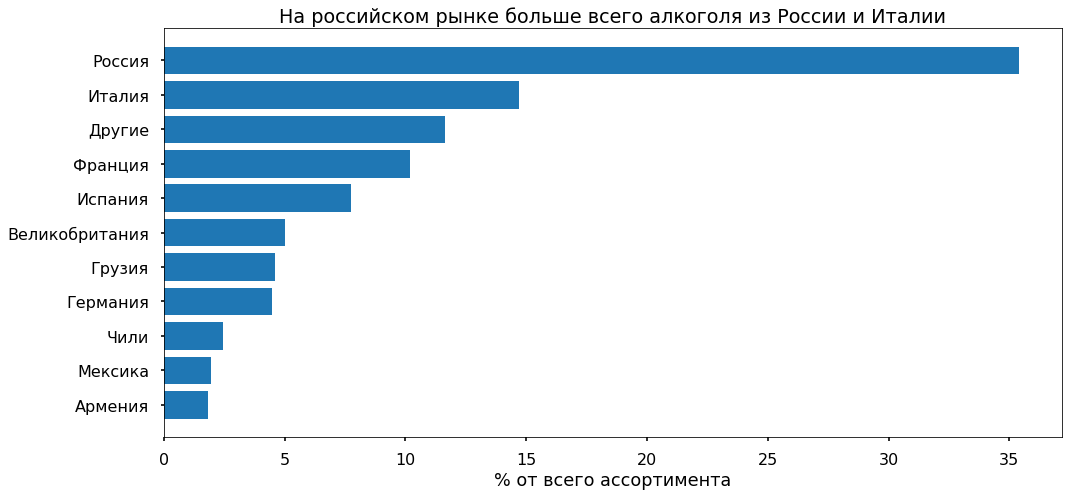

In [113]:
fig = plt.figure(figsize=[15,7])
ax = fig.add_subplot(111)
ax.barh(np.arange(len(df_country['index']))[::-1], df_country.percents)
ax.set_yticks(np.arange(len(df_country['index']))[::-1])
ax.set_yticklabels(df_country['index'])
plt.title('На российском рынке больше всего алкоголя из России и Италии')
plt.ylabel(' ')
plt.xlabel('% от всего ассортимента')
plt.tight_layout()
plt.show()
fig.savefig('../images/На российском рынке больше всего алкоголя из России и Италии.png')

In [47]:
# Средняя цена по ТОП-10 странам
df_country2 = df.groupby('country')['price'].mean().reset_index()
df_country2 = df_country2.sort_values('price', ascending=False)
df_country2 = df_country2[df_country2.country.isin(df_country['index'])]
df_country2

,country,price
7,Великобритания,1698.506327
27,Франция,1235.090600
19,Мексика,925.398421
17,Италия,552.131042
16,Испания,430.716842
29,Чили,420.342083
3,Армения,418.670556
12,Грузия,367.366444
10,Германия,284.800682
24,Россия,225.893919


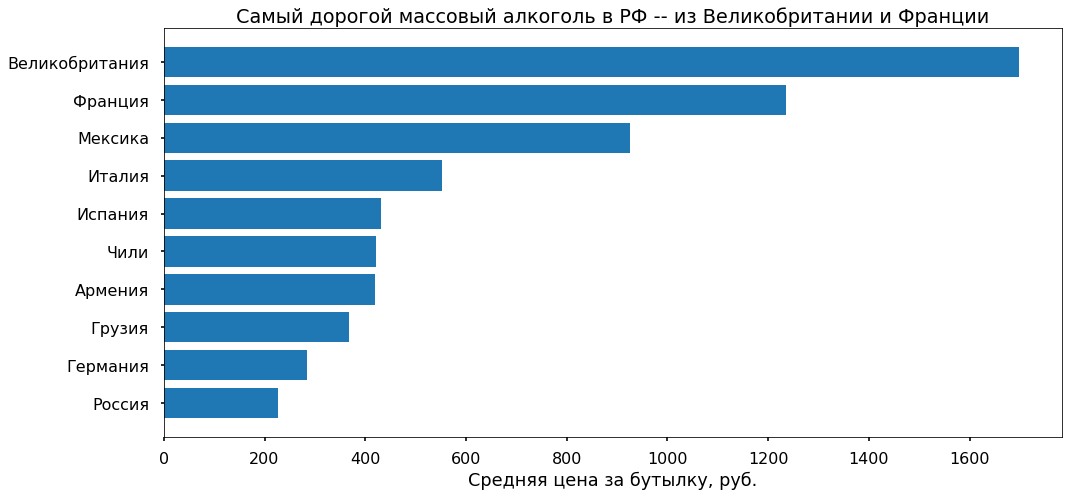

In [69]:
fig = plt.figure(figsize=[15,7])
ax = fig.add_subplot(111)
ax.barh(np.arange(len(df_country2.country))[::-1], df_country2.price)
ax.set_yticks(np.arange(len(df_country2.country))[::-1])
ax.set_yticklabels(df_country2.country)
plt.title('Самый дорогой массовый алкоголь в РФ -- из Великобритании и Франции')
plt.ylabel(' ')
plt.xlabel('Средняя цена за бутылку, руб.')
plt.tight_layout()
plt.show()
fig.savefig('../images/Самый дорогой массовый алкоголь в РФ -- из Великобритании и Франции.png')

### Вид алкоголя

In [51]:
# Ассортимент по видам алкоголя
df_cat1 = df.category.value_counts().reset_index()
df_cat1['percents'] = round(df_cat1.category/df_cat1.category.sum()*100, 2)
df_cat1

,index,category,percents
0,Вино,439,44.80
1,"Водка, Настойки",142,14.49
2,"Коньяк, Армяньяк",107,10.92
3,"Вино игристое, Вермут",83,8.47
4,"Виски, Бурбон",79,8.06
5,"Текила, Ром, Ликер",70,7.14
6,Пиво,46,4.69
7,Винные коктейли,14,1.43


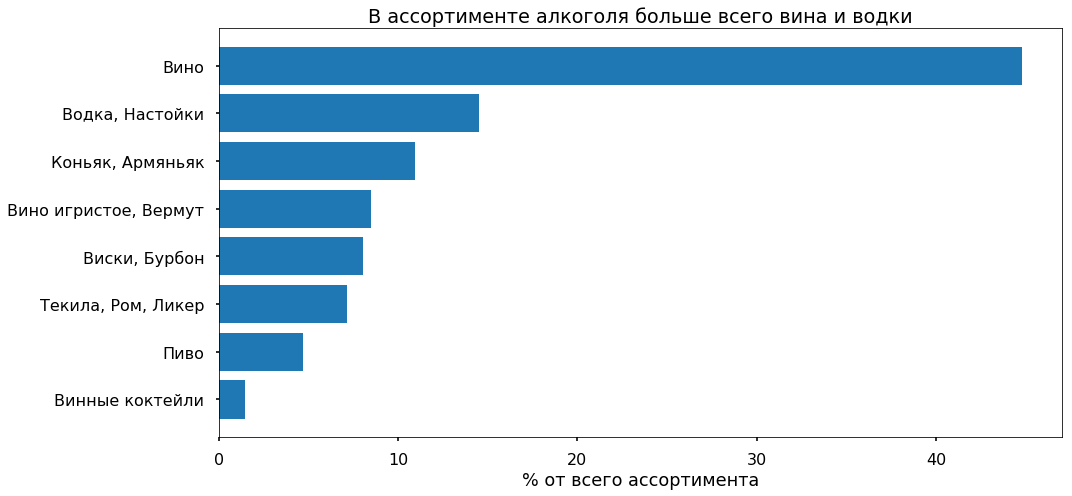

In [114]:
fig = plt.figure(figsize=[15,7])
ax = fig.add_subplot(111)
ax.barh(np.arange(len(df_cat1['index']))[::-1], df_cat1.percents)
ax.set_yticks(np.arange(len(df_cat1['index']))[::-1])
ax.set_yticklabels(df_cat1['index'])
plt.title('В ассортименте алкоголя больше всего вина и водки')
plt.ylabel(' ')
plt.xlabel('% от всего ассортимента')
plt.tight_layout()
plt.show()
fig.savefig('../images/Самый массовый алкоголь в РФ -- вино и водка.png')

In [48]:
# Цена по видам алкоголя
df_cat = df.groupby('category')['price'].mean().reset_index()
df_cat = df_cat.sort_values('price', ascending=False)

In [49]:
df_cat

,category,price
3,"Виски, Бурбон",1834.648987
5,"Коньяк, Армяньяк",901.839159
7,"Текила, Ром, Ликер",810.889000
2,"Вино игристое, Вермут",602.291084
1,Вино,394.312961
4,"Водка, Настойки",296.704648
6,Пиво,71.551739
0,Винные коктейли,65.872143


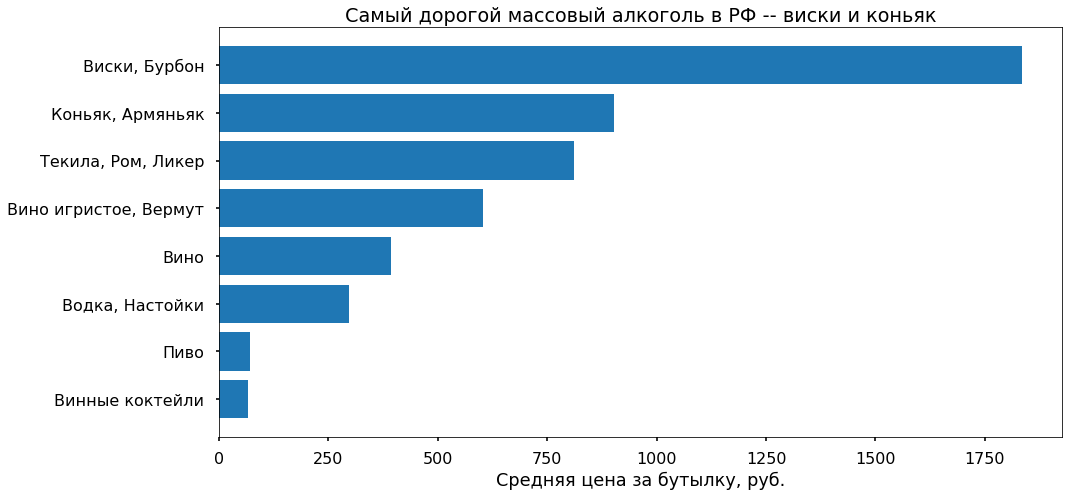

In [70]:
fig = plt.figure(figsize=[15,7])
ax = fig.add_subplot(111)
ax.barh(np.arange(len(df_cat.category))[::-1], df_cat.price)
ax.set_yticks(np.arange(len(df_cat.category))[::-1])
ax.set_yticklabels(df_cat.category)
plt.title('Самый дорогой массовый алкоголь в РФ -- виски и коньяк')
plt.ylabel(' ')
plt.xlabel('Средняя цена за бутылку, руб.')
plt.tight_layout()
plt.show()
fig.savefig('../images/Самый дорогой массовый алкоголь в РФ -- виски и коньяк.png')

### Россия

In [54]:
# Данные по России
df_rus = df[df.country=='Россия']
df_rus = df_rus.category.value_counts().reset_index()
df_rus['percents'] = round(df_rus.category/df_rus.category.sum()*100, 2)
df_rus

,index,category,percents
0,"Водка, Настойки",131,37.75
1,Вино,80,23.05
2,"Коньяк, Армяньяк",50,14.41
3,"Вино игристое, Вермут",31,8.93
4,Пиво,22,6.34
5,"Текила, Ром, Ликер",15,4.32
6,Винные коктейли,14,4.03
7,"Виски, Бурбон",4,1.15


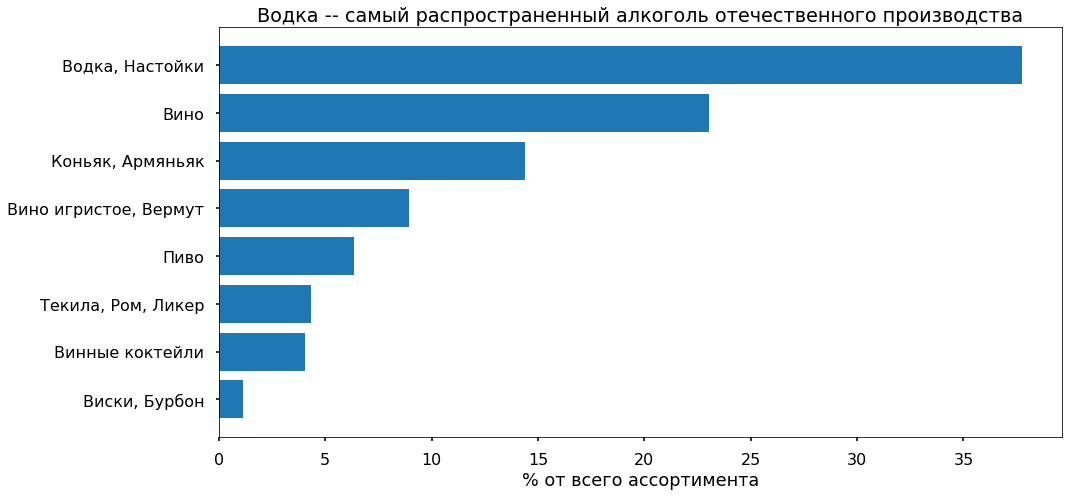

In [115]:
fig = plt.figure(figsize=[15,7])
ax = fig.add_subplot(111)
ax.barh(np.arange(len(df_rus.category))[::-1], df_rus.percents)
ax.set_yticks(np.arange(len(df_rus['index']))[::-1])
ax.set_yticklabels(df_rus['index'])
plt.title('Водка -- самый распространенный алкоголь отечественного производства')
plt.ylabel(' ')
plt.xlabel('% от всего ассортимента')
plt.tight_layout()
plt.show()
fig.savefig('../images/Водка -- самый распространенный алкоголь отечественного производства.png')

In [76]:
# Цена по видам алкоголя (российское производство)
df_cat_rus = df[df.country=='Россия']
df_cat_rus = df_cat_rus.groupby('category')['price'].mean().reset_index()
df_cat_rus = df_cat_rus.sort_values('price', ascending=False)
df_cat_rus

,category,price
5,"Коньяк, Армяньяк",313.251400
4,"Водка, Настойки",273.323511
3,"Виски, Бурбон",262.720000
7,"Текила, Ром, Ликер",233.027333
1,Вино,194.468625
2,"Вино игристое, Вермут",149.221935
0,Винные коктейли,65.872143
6,Пиво,57.516818


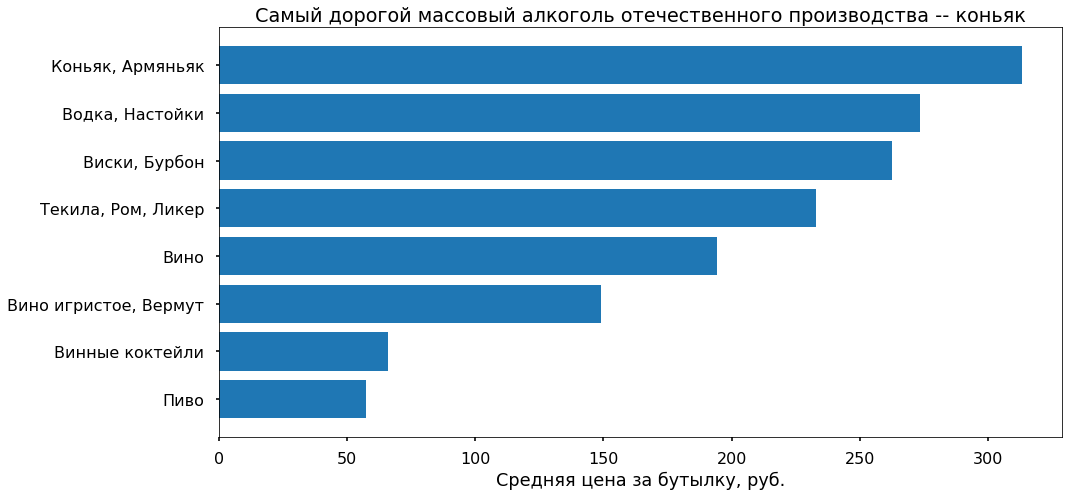

In [116]:
fig = plt.figure(figsize=[15,7])
ax = fig.add_subplot(111)
ax.barh(np.arange(len(df_cat_rus.category))[::-1], df_cat_rus.price)
ax.set_yticks(np.arange(len(df_cat_rus.category))[::-1])
ax.set_yticklabels(df_cat_rus.category)
plt.title('Самый дорогой массовый алкоголь отечественного производства -- коньяк')
plt.ylabel(' ')
plt.xlabel('Средняя цена за бутылку, руб.')
plt.tight_layout()
plt.show()
fig.savefig('../images/Самый дорогой массовый алкоголь отчественного производства -- коньяк.png')